#### This code draws a stacked area graph that shows how many times Palestine Chronicle, Times of Israel, and Jerusalem Post have been referred by the media/journalists in the input scope over the past three years (2018, 2019, 2020) based on an imaginary sample data file produced by the postprocessor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### We could focus on a different set of sources we are interested in and a different period of times by modifying area_list and time_list defined below.

In [2]:
test_list_associated_publishers = ['972Mag', 'Times of Israel', 'Jerusalem Post','Haaretz','Arutz 7','Israel Hayom','Ynet']

input_file_name = 'input_for_stacked_area_graph.csv'
area_list = test_list_associated_publishers
time_list = [str(i) for i in list(range(2010, 2021))]

In [3]:
def convert_list_variables(df, list_col_names):
    '''
    Convert the column values that are lists but stored as strings
    into Python list types, based on the assumption that the format of a list looks like:
    [96adf8g9200534sf91134465, 13203fs572f502d42957dsf313]
    
    Parameters
    --------
    df: pandas dataframe
    list_col_names: list
                    The list of the column names
    '''
    for index, row in df.iterrows():
        for col_name in list_col_names:
            if pd.notnull(row[col_name]):
                print([index, col_name])
                print(row[col_name][:-1].split(" "))
                df.at[index, col_name] = row[col_name][:-1].split(" ")
                

#### The time when a source was referred is recorded based on the date of publication on which the referring article/tweet was published. e.g., If a NYT article published in 2020 refers to a Times of Israel article published in 2019, the referral is counted for 2020, not 2019.

In [4]:
def record_number_of_references_each(df, time_interval, column_name, column_value):
    '''
    Record the number of references of sources with a specific characteristic
    (e.g., sources whose 'associated publisher' is 'Times of Israel')
    
    Parameters
    --------
    df: pandas dataframe
        data read as pandas dataframe from the postprocessed .csv file
    time_interval: string
                   'month' or 'year'
    column_name: string
                 column name to focus on. e.g., 'associated publisher'
    column_value: string
                  column value for a specific source. e.g., 'Times of Israel'
                  
    Return
    --------
    date_dic: dictionary (key:time, value:the number of references)
    '''
    date_dic = {}
    
    # for each source in the area category
    for index, row in df.loc[df[column_name] == column_value].iterrows():
        # record the publication date of each referring article/tweet
        if row['referring record id'] and row['referring record id'] !="null":
            referring_record_ids = row['referring record id'][:-1].split(" ")
            for referring_id in referring_record_ids:
                if time_interval == 'year':
                    # if pd.notnull(df.at[referring_id, 'date of publication']):
                    if type(df.at[referring_id, 'date of publication']) is str:
                        year = df.at[referring_id, 'date of publication'][:4]
                        if type(year) is str:
                            if year not in date_dic:
                                date_dic[year] = 1
                            else:
                                date_dic[year] += 1
                if time_interval == 'month':
                    # if pd.notnull(df.at[referring_id, 'date of publication']):
                    year_month = df.at[referring_id, 'date of publication'][:7]
                    if type(year_month) is str:
                        if year_month not in date_dic:
                            date_dic[year_month] = 1
                        else:
                            date_dic[year_month] += 1
    return date_dic

In [5]:
def record_number_of_references(df, time_interval, time_list, column_name, area_list):
    '''
    Record the number of references of sources with specific characteristics
    (e.g., sources whose 'associated publisher' is 'Times of Israel',
    those whose 'associated publisher' is 'Palestine Chronicle',
    and those whose 'associated publisher' is 'Jerusalem Post')
    
    Parameters
    --------
    df: pandas dataframe
        data read as pandas dataframe from the postprocessed .csv file
    time_interval: string
                   'month' or 'year'
    column_name: string
                 column name to focus on. e.g., 'associate publisher'
    area_list: list
               a list of column value of interest
               e.g., ['Palestine Chronicle', 'Times of Israel', 'Jerusalem Post']
                  
    Return
    --------
    a pandas dataframe with time points (e.g., 2018, 2019, 2020) as indices and
    area names (e.g., 'Palestine Chronicle', 'Times of Israel', 'Jerusalem Post')
    as column labels
    '''
    data_all_area_list = []
    
    # for each area category
    for column_value in area_list:
        # date of reference for the area
        data_each_area = record_number_of_references_each(df, time_interval, column_name, column_value)
        data_each_area_list = []
        for time in time_list:
            if time in data_each_area:
                data_each_area_list.append(data_each_area[time])
            else:
                data_each_area_list.append(0)
        data_all_area_list.append(data_each_area_list)
        
    return pd.DataFrame(list(map(list, zip(*data_all_area_list))), index=time_list, columns=area_list) 

In [6]:
# read the postprocessed data file (.csv) as a pandas dataframe
with open(input_file_name, encoding='utf-8', newline='') as f:
    df_raw = pd.read_csv(input_file_name)

# set the IDs as indices
df_raw.set_index('id', inplace=True)

# convert the list variables that are stored as strings into Python list type
list_col_names = ['referring record id', 'tags']

# convert_list_variables(df_raw, list_col_names)

#### Below is how the imaginary sample data from the postprocessor, which I made up, looks like (I left unused cells empty):

In [7]:
df_raw

,url or alias text,referring record id,number of referrals,type,associated publisher,tags,name/title,language,authors,date of publication,plain text,image reference,anchor text,Unnamed: 14
id,,,,,,,,,,,,,,
e93fd1c0-8664-5863-890a-8eb0caac2760,https://abcnews.go.com/,205811423551553536 761023335727702016 20030189...,4.0,domain,ABC News,left-center Referring International NAmerica,ABC News,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0f8ed509-4c91-5f4b-a4d0-e14ad00e1972,https://www.afp.com/en,967898051976335362 1006430510074085378 9373992...,5.0,domain,Agence France Presse,Referring International Europe,Agence France Presse,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9aeb93a6-b1b1-5692-89d6-9e309296d704,https://alghad.com,563003928930168832,1.0,domain,Al Ghad,Referring International MENA,Al Ghad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e37933b7-7587-5bce-ba09-1716711e3035,https://www.aljazeera.com/,73339594824892416 311056248009261056 310009059...,218.0,domain,Al Jazeera,left-center Referring International MENA,Al Jazeera,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e5afe261-4de0-503c-86d6-f5e71f49f031,https://www.antiwar.com/,124106283476463617,1.0,domain,Antiwar Blog,Referring International NAmerica,Antiwar Blog,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129499353339564032,https://twitter.com/ddknyt/status/112949935333...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-17,NaN,NaN,NaN,NaN
1168865372617007105,https://twitter.com/VivianHYee/status/11688653...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03,NaN,NaN,NaN,NaN
1236034230788009988,https://twitter.com/ABarnardNYT/status/1236034...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,NaN,NaN,NaN


In [8]:
df = record_number_of_references(df_raw, 'year', time_list, 'associated publisher', area_list)

#### Below is how the data behind the stacked area chart looks like:

In [9]:
df

,972Mag,Times of Israel,Jerusalem Post,Haaretz,Arutz 7,Israel Hayom,Ynet
2010,1,0,2,18,0,0,2
2011,0,0,10,25,0,0,1
2012,0,2,18,41,2,3,0
2013,0,1,9,9,0,0,0
2014,1,3,5,17,0,0,5
2015,0,2,3,11,0,3,0
2016,0,0,2,9,0,2,0
2017,0,2,10,3,0,1,0
2018,1,2,1,6,0,0,0
2019,0,0,8,5,0,1,0


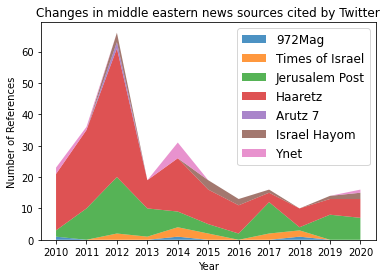

In [10]:
plt.stackplot(time_list,
              df.transpose(),
              labels=area_list,
              alpha=0.8)

plt.legend(loc=0, fontsize='large')
plt.title("Changes in middle eastern news sources cited by Twitter")
plt.ylabel("Number of References")
plt.xlabel("Year")
plt.show()

#### The data file exported as .csv file below can be used to produce a stacked area graph or graphs of similar types with other libraries/languages/tools.

In [11]:
df.to_csv('data_for_stacked_area_chart.csv')  